<H1> Building a Model

In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.read_csv('clean_df.csv')

<H2> Linear Regression:

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [3]:
x = df[['highway-mpg']]
y = df['price']
lr.fit(x,y)
y_pred = lr.predict(x)
print(y_pred)

[16163.21162693 16163.21162693 16952.58440514 13795.09329228
 20110.075518   17741.95718336 17741.95718336 17741.95718336
 21688.82107443 20110.075518   14584.4660705  14584.4660705
 15373.83884871 15373.83884871 17741.95718336 20110.075518
 20110.075518   21688.82107443 -4360.48060665  3533.2471755
  3533.2471755   5111.99273193  7480.11106657 13795.09329228
  7480.11106657  7480.11106657  7480.11106657 13795.09329228
 13795.09329228 18531.32996157 -5149.85338486  7480.11106657
  4322.61995371 10637.60217943 10637.60217943 10637.60217943
 10637.60217943 11426.97495764 11426.97495764 11426.97495764
 11426.97495764 15373.83884871 13005.72051407 14584.4660705
  3533.2471755   3533.2471755  14584.4660705  22478.19385264
 22478.19385264 24056.93940907 13005.72051407  7480.11106657
  7480.11106657  7480.11106657  7480.11106657 19320.70273978
 19320.70273978 19320.70273978 19320.70273978 12216.34773586
 12216.34773586 12216.34773586 12216.34773586  4322.61995371
 12216.34773586 16163.2116269

In [4]:
print('Coefficient,b1:',lr.coef_)
print('Intercept,b0:',lr.intercept_)


Coefficient,b1: [-789.37277821]
Intercept,b0: 37476.27663871601


(0.0, 48136.637738468446)

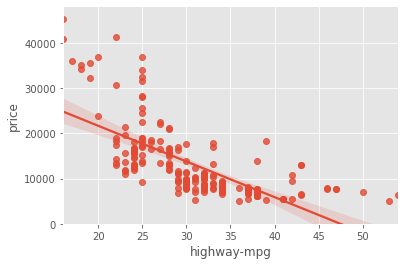

In [5]:
import seaborn as sb
sb.regplot(x,y,data=df)
plt.ylim(0,)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

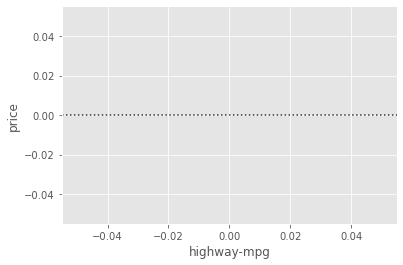

In [6]:
sb.residplot(df[['highway-mpg']],df['price'])

<AxesSubplot:xlabel='price'>

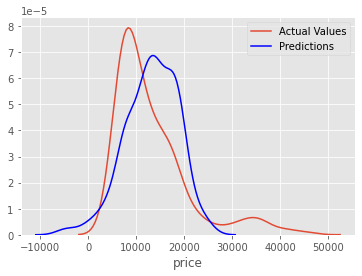

In [7]:
ax1 = sb.distplot(df['price'],hist=False,label='Actual Values')
sb.distplot(y_pred,hist=False,color='b',label='Predictions',ax=ax1)

<h2> Multiple Linear Regression

In [24]:
x = df[['horsepower','curb-weight','engine-size','highway-mpg']]
y = df['price']
mlr = LinearRegression()
mlr.fit(x,y)

y_pred_m = mlr.predict(x)
print(y_pred_m)

[ 1.38592085e+04  1.38592085e+04  1.79559102e+04  1.05684711e+04
  1.59221402e+04  1.44299890e+04  1.57074335e+04  1.61244035e+04
  1.69822746e+04  1.70732587e+04  1.07369031e+04  1.07369031e+04
  1.80301433e+04  1.82386283e+04  1.95406277e+04  2.60425270e+04
  2.66111224e+04  2.72200952e+04 -2.11303341e+01  5.44574741e+03
  5.57841969e+03  5.55335011e+03  5.75606499e+03  8.66043531e+03
  6.10101291e+03  6.18440691e+03  6.18440691e+03  8.89924540e+03
  1.23918285e+04  1.82932604e+04  4.08430742e+03  5.88335748e+03
  4.08166350e+03  6.61231101e+03  6.67296119e+03  6.87765556e+03
  6.93072447e+03  9.80336299e+03  1.00042667e+04  1.00611263e+04
  1.03188895e+04  1.12726907e+04  1.04004254e+04  1.04174521e+04
  5.44574741e+03  5.57841969e+03  1.29445515e+04  3.42791982e+04
  3.42791982e+04  4.23824948e+04  6.38357101e+03  5.94847598e+03
  5.96742916e+03  6.11905462e+03  6.13800780e+03  7.23091631e+03
  7.23091631e+03  7.24986949e+03  9.29722100e+03  1.16178461e+04
  1.17126120e+04  1.16178

In [25]:
print('Coefficients;b1,b2,b3,b4:',mlr.coef_)
print('Intercept;b0:',mlr.intercept_)

Coefficients;b1,b2,b3,b4: [ 17.56091808   3.79063647 101.43570973 -67.57162887]
Intercept;b0: -9110.803430470713


<AxesSubplot:xlabel='price'>

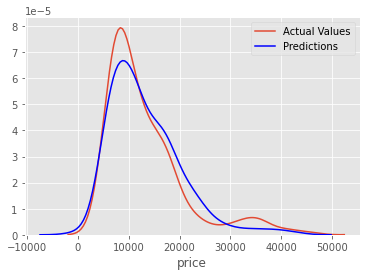

In [26]:
ax1 = sb.distplot(df['price'],hist=False,label='Actual Values')
sb.distplot(y_pred_m,hist=False,color='b',label='Predictions',ax=ax1)

<AxesSubplot:xlabel='price'>

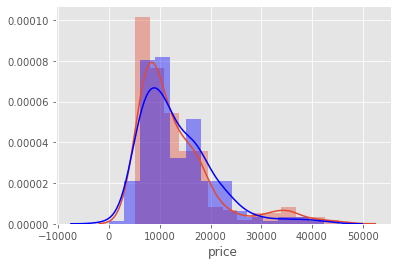

In [27]:
ax1 = sb.distplot(df['price'],label='Actual Values')
sb.distplot(y_pred_m,color='b',label='Predictions',ax=ax1)

<h2> Polynomial Regression

In [40]:
x = df['highway-mpg']
y = df['price']

n = np.polyfit(x,y,3)
p = np.poly1d(n)
p

poly1d([-1.63777158e+00,  2.13089399e+02, -9.21417403e+03,  1.40028219e+05])

In [41]:
x = df[['highway-mpg']]

from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 4,include_bias=False)
lr = LinearRegression()
reg = pr.fit_transform(x)
lr.fit(reg,y)

LinearRegression()

In [42]:
y_pred_p = lr.predict(reg)
y_pred_p

array([14320.94845083, 14320.94845083, 15658.73200598, 11228.36358421,
       22893.74446581, 17171.28743171, 17171.28743171, 17171.28743171,
       27839.45833106, 22893.74446581, 12118.13607699, 12118.13607699,
       13144.94287109, 13144.94287109, 17171.28743171, 22893.74446581,
       22893.74446581, 27839.45833106,  6806.59568251,  7351.36611764,
        7351.36611764,  7421.20767187,  7720.5331633 , 11228.36358421,
        7720.5331633 ,  7720.5331633 ,  7720.5331633 , 11228.36358421,
       11228.36358421, 18872.02332865,  6634.53524821,  7720.5331633 ,
        7377.96979503,  8810.84162995,  8810.84162995,  8810.84162995,
        8810.84162995,  9265.82765204,  9265.82765204,  9265.82765204,
        9265.82765204, 13144.94287109, 10463.87561386, 12118.13607699,
        7351.36611764,  7351.36611764, 12118.13607699, 30696.7402835 ,
       30696.7402835 , 37259.63839404, 10463.87561386,  7720.5331633 ,
        7720.5331633 ,  7720.5331633 ,  7720.5331633 , 20774.76300286,
      

<AxesSubplot:xlabel='price'>

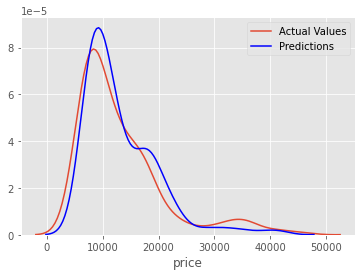

In [31]:
ax1 = sb.distplot(df['price'],hist=False,label='Actual Values')
sb.distplot(y_pred_p,hist=False,color='b',label='Predictions',ax=ax1)

<h2> PipeLines

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [33]:
input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode',LinearRegression())]

pipe = Pipeline(input)

In [43]:
pipe.fit(df[['horsepower','curb-weight','engine-size','highway-mpg']],y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [46]:
y_pipeline = pipe.predict(df[['horsepower','curb-weight','engine-size','highway-mpg']])
print(y_pipeline)

[13359.51133016 13359.51133016 18142.19069314 10731.45414581
 15995.26472187 13735.23557721 15002.51532173 15466.13904067
 18613.85092085 18404.21299876 10740.46191986 10740.46191986
 16164.41623281 16318.5511258  18562.22546147 25756.5320495
 25024.32381846 26678.11466696  6589.78396458  6896.79531306
  6845.73710014  6710.55180886  6306.82922111 10695.65381938
  6467.48376033  6508.84984641  6508.84984641 10536.78561044
 10951.07304712 19143.0331937   7340.1398648   7208.02209998
  5903.30209504  6724.46838554  6753.33401991  6854.59715807
  6881.8180839   8930.25810083  9057.4406221   9094.47230349
  9268.08526845 11054.31433198 10424.1989476   8400.92964178
  6896.79531306  6845.73710014 11924.22689848 36239.08666991
 36239.08666991 41399.4640712   4385.75506223  6379.1829756
  6388.47440385  6464.63517368  6474.3839379  10208.89666064
 10208.89666064 10199.65817396 16156.38631498  9971.98090885
 10105.79332111  9971.98090885 10105.79332111 11096.47168659
 10186.69054975 14794.7572

<AxesSubplot:xlabel='price'>

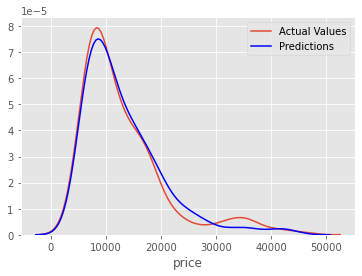

In [45]:
ax1 = sb.distplot(df['price'],hist=False,label='Actual Values')
sb.distplot(y_pipeline,hist=False,color='b',label='Predictions',ax=ax1)

<h2>Measures for In-Sample Evaluation</h2><br>1.Mean Squared Error(MSE)<br>2.R-Squared

In [47]:
# MSE is found using mean_squared_error class from sklearn.matrics module
from sklearn.metrics import mean_squared_error
mse_linear = mean_squared_error(df['price'],y_pred)
mse_multilinear = mean_squared_error(df['price'],y_pred_m)
mse_polynomial = mean_squared_error(df['price'],y_pred_p)
mse_pipeline = mean_squared_error(df['price'],y_pipeline)
print(mse_linear)
print(mse_multilinear)
print(mse_polynomial)
print(mse_pipeline)

32211114.34189624
13795669.833186982
20858710.961904943
10266341.30961457


In [49]:
# R-Squared if found using score method of LinearRegression Class Object
lr.fit(df[['highway-mpg']],df['price'])
R_linear = lr.score(df[['highway-mpg']],df['price'])
print(R_linear)


0.4772344226157478


In [50]:
lr.fit(df[['horsepower','curb-weight','engine-size','highway-mpg']],df['price'])
R_multilinear = lr.score(df[['horsepower','curb-weight','engine-size','highway-mpg']],df['price'])
print(R_multilinear)

0.7761051906121685
